# Анализ и прогноз на основе регрессионной модели

## Часть 1 Подготовка датасета

### Подключение библиотек

### Загрузка датасета

### Обработка датасета

### Создание выборок

## Часть 2 Прогнозирование

### Линейная регрессия

Визуализация результатов

### Метрики качества

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('15.csv')

In [3]:
df['holiday'] = df['holiday'].astype('category').cat.codes
df['weather_main'] = df['weather_main'].astype('category')
df['weather_main_codes'] = df['weather_main'].cat.codes

class_labels = df['weather_main'].cat.categories.tolist()
print("Метки классов для weather_main:", class_labels)

data_cleaned = df.drop(columns=['weather_main'])

Метки классов для weather_main: ['Clear', 'Clouds', 'Drizzle', 'Fog', 'Haze', 'Mist', 'Rain', 'Smoke', 'Snow', 'Squall', 'Thunderstorm']


In [5]:
df_reg_data = df.drop(['traffic_volume'], axis=1)
df_reg_target = df['traffic_volume']

df_cl_data = df.drop(['weather_main_codes'], axis=1)
df_cl_target = df['weather_main_codes']

In [6]:
data_train_reg, data_test_reg, y_train, y_test = train_test_split(
    df_reg_data, df_reg_target, 
    test_size=0.3, random_state=42
)

data_train_cl, data_test_cl, target_train_cl, target_test_cl = train_test_split(
    df_cl_data, df_cl_target, 
    test_size=0.3, random_state=42
)

In [7]:
data_train_encoded = pd.get_dummies(data_train_reg)
data_test_encoded = pd.get_dummies(data_test_reg)

data_test_encoded = data_test_encoded.reindex(columns=data_train_encoded.columns, fill_value=0)


linear_regression = LinearRegression()
model_lin = linear_regression.fit(data_train_encoded, y_train)

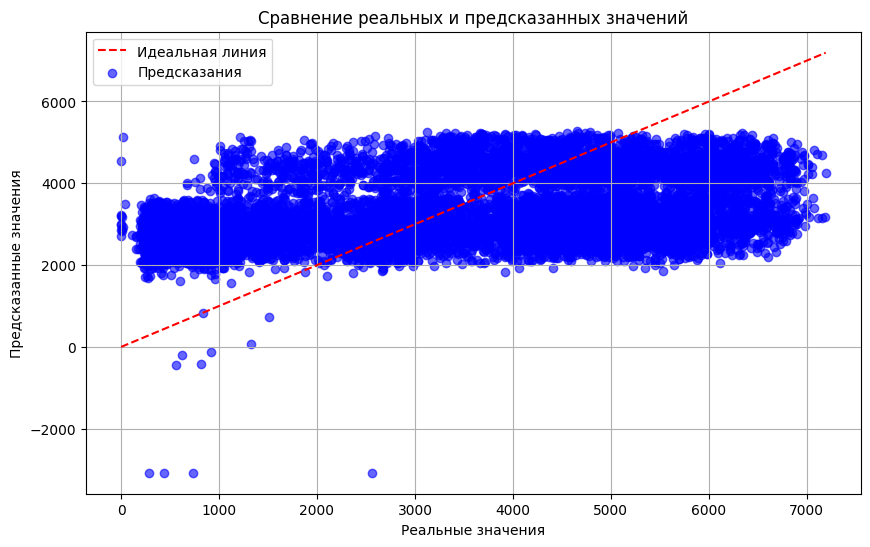

In [9]:


predicted_lin = model_lin.predict(data_test_encoded)


plt.figure(figsize=(10, 6))

plt.plot([min(real_values), max(real_values)], [min(real_values), max(real_values)], color='red', linestyle='--', label='Идеальная линия')

plt.scatter(real_values, predicted_lin, alpha=0.6, label='Предсказания', color='blue')

plt.title('Сравнение реальных и предсказанных значений')
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.legend()
plt.grid(True)
plt.show()